## Disclaimer
This data analysis is not meant for any reference purpose and its result may not be accurate. Any insights from this reference is not recommended to use for any educational or research purpose or any other. The Sex Ratio in this analysis taken as number of females per 1000 males. 

### Data Source: Censusindia.gov.in

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [49]:
df = pd.read_excel('https://censusindia.gov.in/2011census/C-01/DDW00C-01%20MDDS.XLS')
df.head(7)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Table,State,Distt.,Tehsil,Town,Area Name,Total/,NaN,NaN,NaN,Religious communities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,Code,Code,Code,Code,NaN,Rural/,Total,NaN,NaN,Hindu,NaN,NaN,Muslim,NaN,NaN,Christian,NaN,NaN,Sikh,NaN,NaN,Buddhist,NaN,NaN,Jain,NaN,NaN,Other religions and persuasions (incl.Unclassi...,NaN,NaN,Religion not stated,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Urban,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C0100,00,000,00000,000000,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591


In [50]:
df.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head(7)

,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Area Name,Total/,NaN,NaN,NaN,Religious communities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Rural/,Total,NaN,NaN,Hindu,NaN,NaN,Muslim,NaN,NaN,Christian,NaN,NaN,Sikh,NaN,NaN,Buddhist,NaN,NaN,Jain,NaN,NaN,Other religions and persuasions (incl.Unclassi...,NaN,NaN,Religion not stated,NaN,NaN
2,NaN,Urban,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
3,NaN,NaN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591


In [51]:
df.drop([0,3,4,5],axis=0,inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head(7)

,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,Rural/,Total,NaN,NaN,Hindu,NaN,NaN,Muslim,NaN,NaN,Christian,NaN,NaN,Sikh,NaN,NaN,Buddhist,NaN,NaN,Jain,NaN,NaN,Other religions and persuasions (incl.Unclassi...,NaN,NaN,Religion not stated,NaN,NaN
1,NaN,Urban,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
2,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
3,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
4,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075
5,State - JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189
6,State - JAMMU & KASHMIR,Rural,9108060,4774477,4333583,2516370,1361954,1154416,6356473,3284844,3071629,15522,9591,5931,116731,65442,51289,87463,43724,43739,355,180,175,1266,664,602,13880,8078,5802


In [52]:
temp = 2
for i in range(9):
  df.loc[0][temp+1] = df.loc[0][temp]
  df.loc[0][temp+2] = df.loc[0][temp]
  temp+=3
df.head()

,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,Rural/,Total,Total,Total,Hindu,Hindu,Hindu,Muslim,Muslim,Muslim,Christian,Christian,Christian,Sikh,Sikh,Sikh,Buddhist,Buddhist,Buddhist,Jain,Jain,Jain,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Religion not stated,Religion not stated,Religion not stated
1,NaN,Urban,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
2,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
3,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
4,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075


In [53]:
for i in range(df.shape[1]):
  df.loc[0][i] = str(df.loc[0][i])
  df.loc[1][i] = str(df.loc[1][i])
  df.loc[1][i] = df.loc[0][i] + '_' + df.loc[1][i]
df.head()

,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,nan,Rural/,Total,Total,Total,Hindu,Hindu,Hindu,Muslim,Muslim,Muslim,Christian,Christian,Christian,Sikh,Sikh,Sikh,Buddhist,Buddhist,Buddhist,Jain,Jain,Jain,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Religion not stated,Religion not stated,Religion not stated
1,nan_nan,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females
2,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
3,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
4,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075


In [54]:
df.drop([0],axis=0,inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head()

,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,nan_nan,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females
1,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
2,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
3,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075
4,State - JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189


In [55]:
df.loc[0][0] = 'Location'
df.columns = list(df.loc[0])
df.head()

,Location,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassified Sect.)_Persons,Other religions and persuasions (incl.Unclassified Sect.)_Males,Other religions and persuasions (incl.Unclassified Sect.)_Females,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females
0,Location,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females
1,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
2,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
3,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075
4,State - JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189


In [56]:
df.drop([0],axis=0,inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head()

,Location,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassified Sect.)_Persons,Other religions and persuasions (incl.Unclassified Sect.)_Males,Other religions and persuasions (incl.Unclassified Sect.)_Females,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females
0,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
1,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
2,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075
3,State - JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189
4,State - JAMMU & KASHMIR,Rural,9108060,4774477,4333583,2516370,1361954,1154416,6356473,3284844,3071629,15522,9591,5931,116731,65442,51289,87463,43724,43739,355,180,175,1266,664,602,13880,8078,5802


In [57]:
df['Latitude'] = None
df['Longitude'] = None
#df[df['Location'] == 'State - ANDAMAN & NICOBAR ISLANDS '].index[0]
#df.head()

In [58]:
df[['temp','Location']] = df.Location.str.split("-",expand=True)
df.Location = df['Location'].str.strip()
del df['temp']
df.head()

,Location,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassified Sect.)_Persons,Other religions and persuasions (incl.Unclassified Sect.)_Males,Other religions and persuasions (incl.Unclassified Sect.)_Females,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females,Latitude,Longitude
0,None,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591,None,None
1,None,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516,None,None
2,None,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075,None,None
3,JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189,None,None
4,JAMMU & KASHMIR,Rural,9108060,4774477,4333583,2516370,1361954,1154416,6356473,3284844,3071629,15522,9591,5931,116731,65442,51289,87463,43724,43739,355,180,175,1266,664,602,13880,8078,5802,None,None


In [59]:
for i in range(3):
  df.loc[i][0] = 'India'
df.head()

,Location,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassified Sect.)_Persons,Other religions and persuasions (incl.Unclassified Sect.)_Males,Other religions and persuasions (incl.Unclassified Sect.)_Females,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females,Latitude,Longitude
0,India,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591,None,None
1,India,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516,None,None
2,India,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075,None,None
3,JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189,None,None
4,JAMMU & KASHMIR,Rural,9108060,4774477,4333583,2516370,1361954,1154416,6356473,3284844,3071629,15522,9591,5931,116731,65442,51289,87463,43724,43739,355,180,175,1266,664,602,13880,8078,5802,None,None


In [60]:
df['Location'] = df['Location'].replace('NCT OF DELHI','DELHI')

In [61]:
from geopy.geocoders import Nominatim
for i in range(df.shape[0]):
  address = df.loc[i][0]
  geolocator = Nominatim(user_agent="ny_explorer")
  location = geolocator.geocode(address)
  df.loc[i][29] = location.latitude
  df.loc[i][30] = location.longitude

In [62]:
df.head()

,Location,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassified Sect.)_Persons,Other religions and persuasions (incl.Unclassified Sect.)_Males,Other religions and persuasions (incl.Unclassified Sect.)_Females,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females,Latitude,Longitude
0,India,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591,22.3511,78.6677
1,India,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516,22.3511,78.6677
2,India,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075,22.3511,78.6677
3,JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189,33.5574,75.0615
4,JAMMU & KASHMIR,Rural,9108060,4774477,4333583,2516370,1361954,1154416,6356473,3284844,3071629,15522,9591,5931,116731,65442,51289,87463,43724,43739,355,180,175,1266,664,602,13880,8078,5802,33.5574,75.0615


In [63]:
df.dtypes

Location                                                             object
Rural/_Urban                                                         object
Total_Persons                                                        object
Total_Males                                                          object
Total_Females                                                        object
Hindu_Persons                                                        object
Hindu_Males                                                          object
Hindu_Females                                                        object
Muslim_Persons                                                       object
Muslim_Males                                                         object
Muslim_Females                                                       object
Christian_Persons                                                    object
Christian_Males                                                      object
Christian_Fe

In [64]:
for i in df:
  if i in ['Location','Rural/_Urban','Latitude','Longitude']:
    continue
  else:
    df[i] = df[i].astype('int')
df.dtypes

Location                                                             object
Rural/_Urban                                                         object
Total_Persons                                                         int64
Total_Males                                                           int64
Total_Females                                                         int64
Hindu_Persons                                                         int64
Hindu_Males                                                           int64
Hindu_Females                                                         int64
Muslim_Persons                                                        int64
Muslim_Males                                                          int64
Muslim_Females                                                        int64
Christian_Persons                                                     int64
Christian_Males                                                       int64
Christian_Fe

In [65]:
df['Total_sr'] = np.ceil(df['Total_Females']/df['Total_Males']*1000)
df['Hindu_sr'] = np.ceil(df['Hindu_Females']/df['Hindu_Males']*1000)
df['Muslim_sr'] = np.ceil(df['Muslim_Females']/df['Muslim_Males']*1000)
df['Christian_sr'] = np.ceil(df['Christian_Females']/df['Christian_Males']*1000)
df['Sikh_sr'] = np.ceil(df['Sikh_Females']/df['Sikh_Males']*1000)
df['Buddhist_sr'] = np.ceil(df['Buddhist_Females']/df['Buddhist_Males']*1000)
df['Jain_sr'] = np.ceil(df['Jain_Females']/df['Jain_Males']*1000)
df['Other religions and persuasions (incl.Unclassified Sect.)_sr'] = np.ceil(df['Other religions and persuasions (incl.Unclassified Sect.)_Females']/
                                                                               df['Other religions and persuasions (incl.Unclassified Sect.)_Males']*1000)
df['Religion not stated_sr'] = np.ceil(df['Religion not stated_Females']/
                                         df['Religion not stated_Males']*1000)
df.head()

,Location,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassified Sect.)_Persons,Other religions and persuasions (incl.Unclassified Sect.)_Males,Other religions and persuasions (incl.Unclassified Sect.)_Females,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females,Latitude,Longitude,Total_sr,Hindu_sr,Muslim_sr,Christian_sr,Sikh_sr,Buddhist_sr,Jain_sr,Other religions and persuasions (incl.Unclassified Sect.)_sr,Religion not stated_sr
0,India,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591,22.3511,78.6677,943.0,940.0,952.0,1024.0,903.0,966.0,955.0,1009.0,959.0
1,India,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516,22.3511,78.6677,950.0,947.0,958.0,1008.0,905.0,960.0,936.0,1009.0,948.0
2,India,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075,22.3511,78.6677,930.0,922.0,942.0,1047.0,899.0,973.0,960.0,1007.0,975.0
3,JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189,33.5574,75.0615,889.0,795.0,935.0,656.0,768.0,995.0,901.0,881.0,689.0
4,JAMMU & KASHMIR,Rural,9108060,4774477,4333583,2516370,1361954,1154416,6356473,3284844,3071629,15522,9591,5931,116731,65442,51289,87463,43724,43739,355,180,175,1266,664,602,13880,8078,5802,33.5574,75.0615,908.0,848.0,936.0,619.0,784.0,1001.0,973.0,907.0,719.0


In [ ]:
#installing conda into colab https://plotly.com/python/orca-management/
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

#package to show static image(such as in github)
# !conda install -c plotly plotly-orca

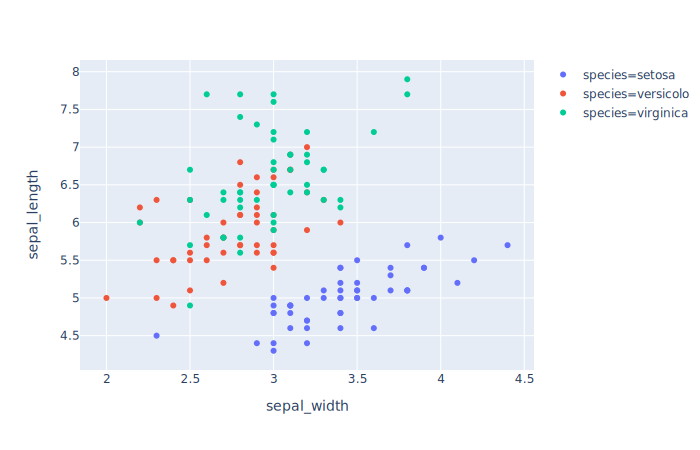

In [80]:
import plotly.express as px
fig = px.scatter(px.data.iris(), x="sepal_width", y="sepal_length", color="species")
fig.show("svg")

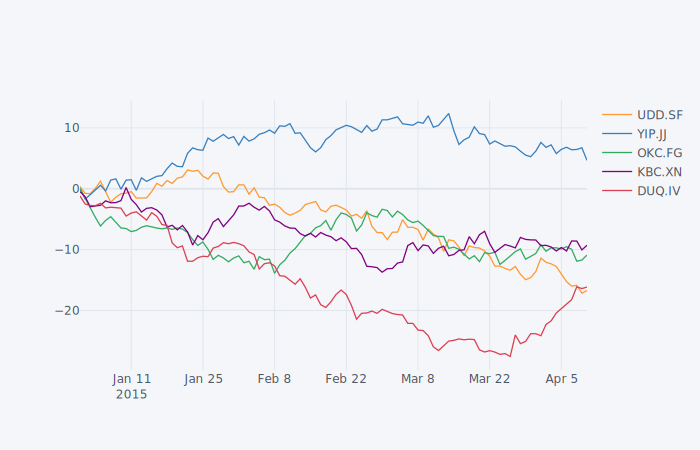

In [81]:
import cufflinks as cf
df = cf.datagen.lines()
fig = df.figure(kind='scatter')
fig.show("svg")